In [2]:
Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, 
Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, 
ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, 
Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, 
Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, 
Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, 
GKKicking, GKPositioning, GKReflexes, and Release Clause.

SyntaxError: invalid syntax (<ipython-input-2-9e6e3498cee9>, line 1)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('fifa19 l2.csv', sep=",")

In [3]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# Список колонок
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
# Список колонок с типами данных
data.dtypes

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                      

In [6]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Unnamed: 0 - 0
ID - 0
Name - 0
Age - 0
Photo - 0
Nationality - 0
Flag - 0
Overall - 0
Potential - 0
Club - 241
Club Logo - 0
Value - 0
Wage - 0
Special - 0
Preferred Foot - 48
International Reputation - 48
Weak Foot - 48
Skill Moves - 48
Work Rate - 48
Body Type - 48
Real Face - 48
Position - 60
Jersey Number - 60
Joined - 1553
Loaned From - 16943
Contract Valid Until - 289
Height - 48
Weight - 48
LS - 2085
ST - 2085
RS - 2085
LW - 2085
LF - 2085
CF - 2085
RF - 2085
RW - 2085
LAM - 2085
CAM - 2085
RAM - 2085
LM - 2085
LCM - 2085
CM - 2085
RCM - 2085
RM - 2085
LWB - 2085
LDM - 2085
CDM - 2085
RDM - 2085
RWB - 2085
LB - 2085
LCB - 2085
CB - 2085
RCB - 2085
RB - 2085
Crossing - 48
Finishing - 48
HeadingAccuracy - 48
ShortPassing - 48
Volleys - 48
Dribbling - 48
Curve - 48
FKAccuracy - 48
LongPassing - 48
BallControl - 48
Acceleration - 48
SprintSpeed - 48
Agility - 48
Reactions - 48
Balance - 48
ShotPower - 48
Jumping - 48
Stamina - 48
Strength - 48
LongShots - 48
Aggression - 48
Intercep

In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 18207


In [8]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка International Reputation. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Weak Foot. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Skill Moves. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Jersey Number. Тип данных float64. Количество пустых значений 60, 0.33%.
Колонка Crossing. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Finishing. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка HeadingAccuracy. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка ShortPassing. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Volleys. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Dribbling. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка Curve. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка FKAccuracy. Тип данных float64. Количество пустых значений 48, 0.26%.
Колонка LongPassing. Тип данных float64. Количество 

In [9]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,4.0,4.0,4.0,10.0,81.0,84.0,61.0,89.0,80.0,95.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
6,4.0,4.0,4.0,10.0,86.0,72.0,55.0,93.0,76.0,90.0,...,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
7,5.0,4.0,3.0,9.0,77.0,93.0,77.0,82.0,88.0,87.0,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
8,4.0,3.0,3.0,15.0,66.0,60.0,91.0,78.0,66.0,63.0,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
9,3.0,3.0,1.0,1.0,13.0,11.0,15.0,29.0,13.0,12.0,...,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0


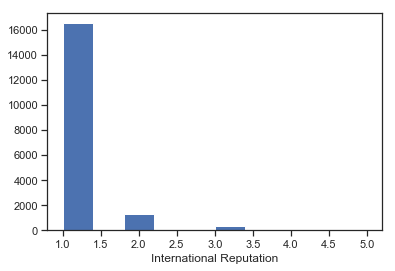

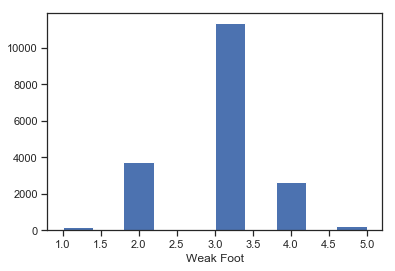

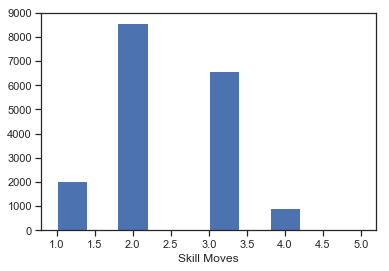

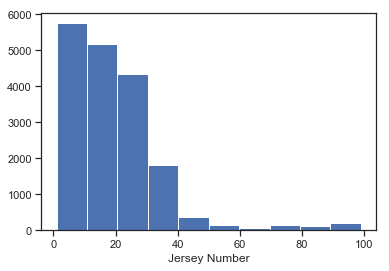

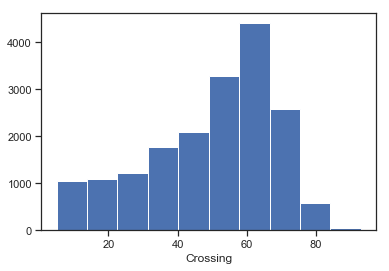

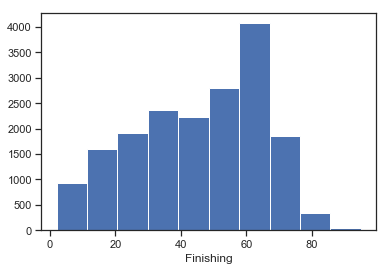

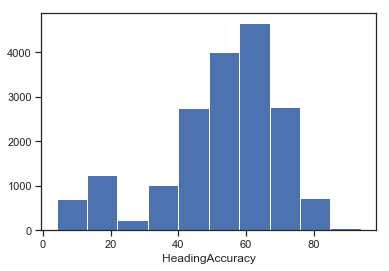

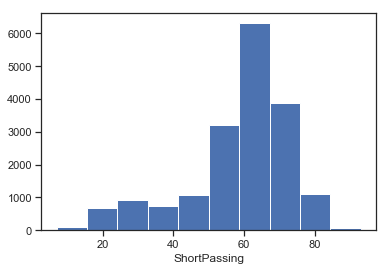

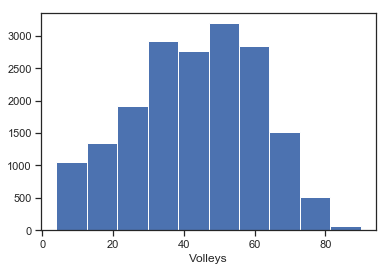

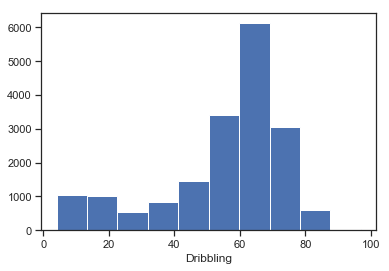

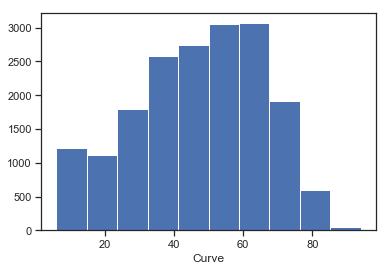

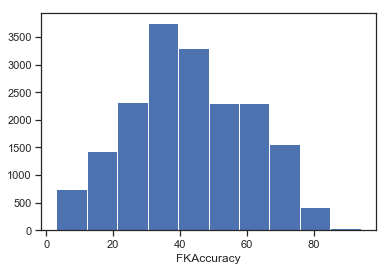

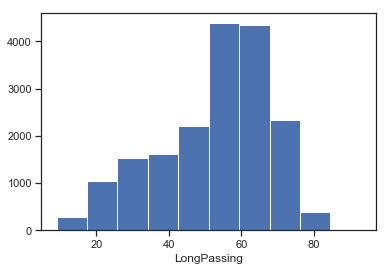

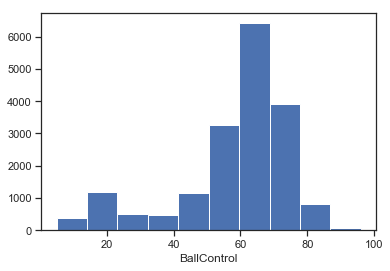

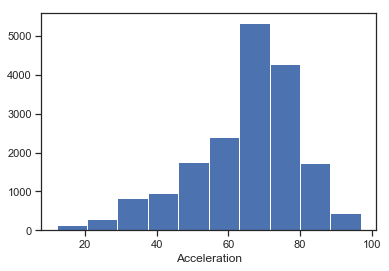

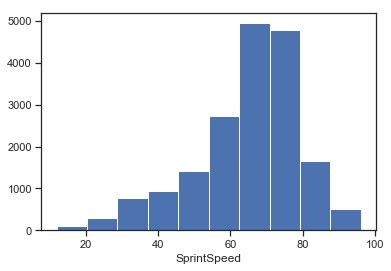

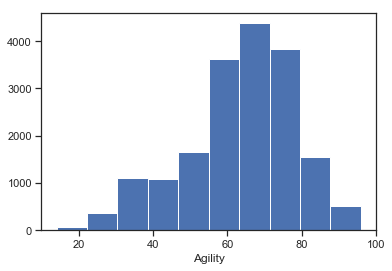

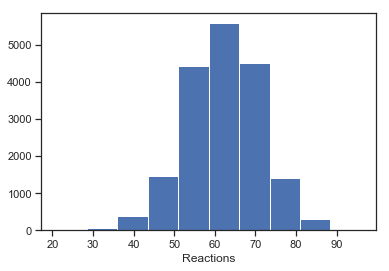

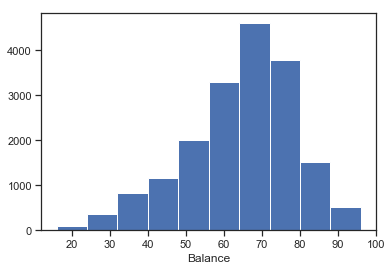

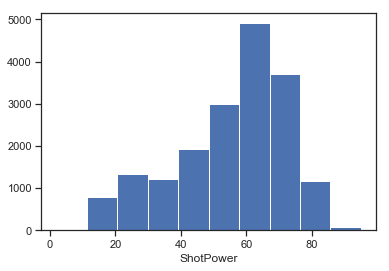

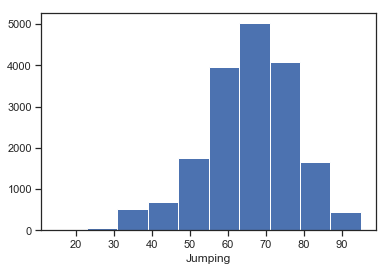

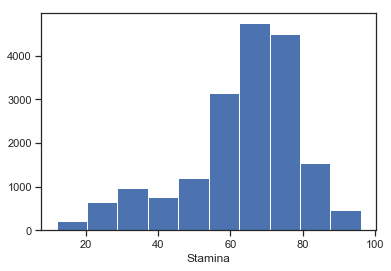

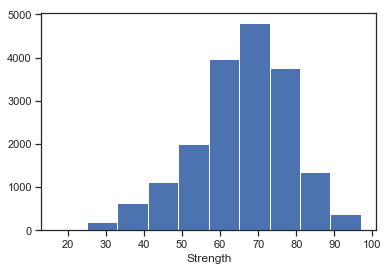

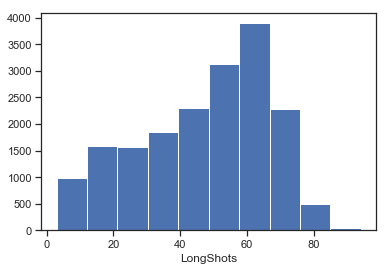

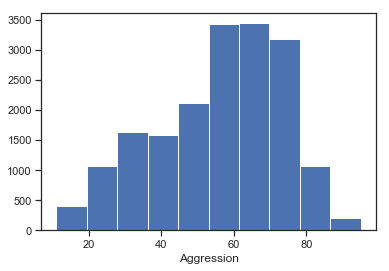

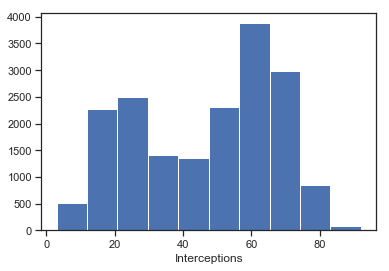

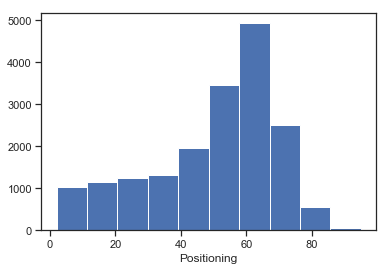

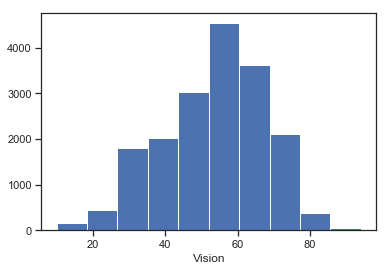

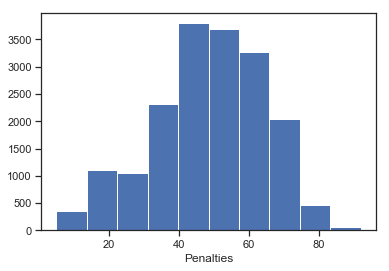

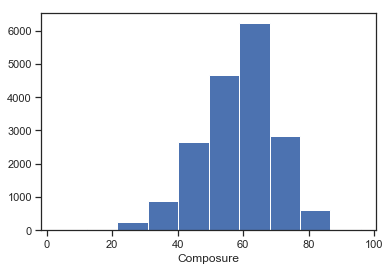

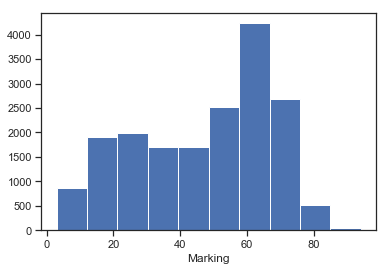

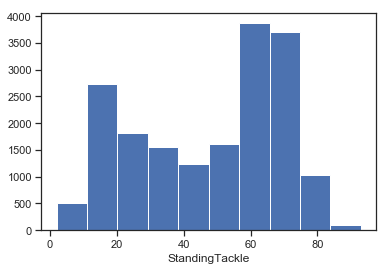

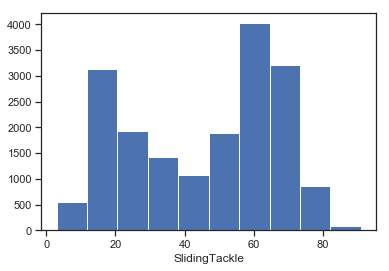

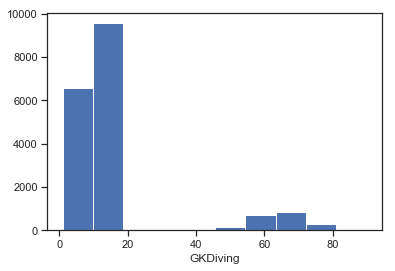

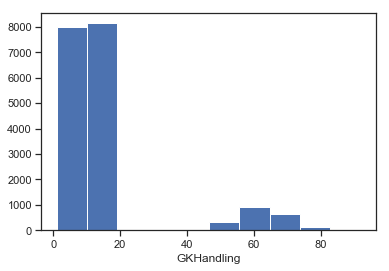

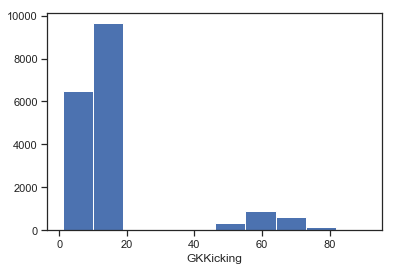

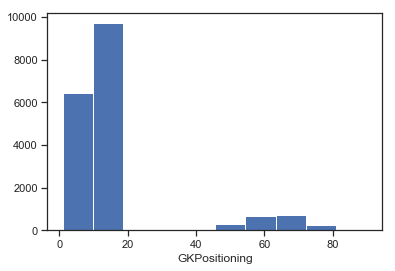

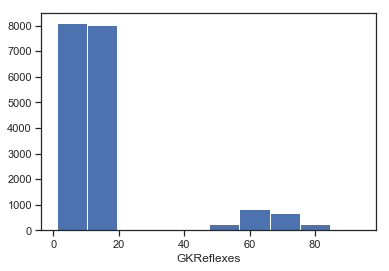

In [10]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col].dropna(), 10)
    plt.xlabel(col)
    plt.show()

In [11]:
# Фильтр по пустым значениям поля MasVnrArea 
data[data['Penalties'].isnull()]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
13236,13236,177971,J. McNulty,33,https://cdn.sofifa.org/players/4/19/177971.png,Scotland,https://cdn.sofifa.org/flags/42.png,62,62,Rochdale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,13237,195380,J. Barrera,29,https://cdn.sofifa.org/players/4/19/195380.png,Nicaragua,https://cdn.sofifa.org/flags/86.png,62,62,Boyacá Chicó FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,13238,139317,J. Stead,35,https://cdn.sofifa.org/players/4/19/139317.png,England,https://cdn.sofifa.org/flags/14.png,62,62,Notts County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,13239,240437,A. Semprini,20,https://cdn.sofifa.org/players/4/19/240437.png,Italy,https://cdn.sofifa.org/flags/27.png,62,72,Brescia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,13240,209462,R. Bingham,24,https://cdn.sofifa.org/players/4/19/209462.png,England,https://cdn.sofifa.org/flags/14.png,62,66,Hamilton Academical FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13241,13241,219702,K. Dankowski,21,https://cdn.sofifa.org/players/4/19/219702.png,Poland,https://cdn.sofifa.org/flags/37.png,62,72,Śląsk Wrocław,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13242,13242,225590,I. Colman,23,https://cdn.sofifa.org/players/4/19/225590.png,Argentina,https://cdn.sofifa.org/flags/52.png,62,70,Club Atlético Aldosivi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13243,13243,233782,M. Feeney,19,https://cdn.sofifa.org/players/4/19/233782.png,England,https://cdn.sofifa.org/flags/14.png,62,78,Everton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13244,13244,239158,R. Minor,30,https://cdn.sofifa.org/players/4/19/239158.png,Denmark,https://cdn.sofifa.org/flags/13.png,62,62,Hobro IK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13245,13245,242998,Klauss,21,https://cdn.sofifa.org/players/4/19/242998.png,Brazil,https://cdn.sofifa.org/flags/54.png,62,69,HJK Helsinki,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Penalties'].isnull()].index
flt_index

Int64Index([13236, 13237, 13238, 13239, 13240, 13241, 13242, 13243, 13244,
            13245, 13246, 13247, 13248, 13249, 13250, 13251, 13252, 13253,
            13254, 13255, 13256, 13257, 13258, 13259, 13260, 13261, 13262,
            13263, 13264, 13265, 13266, 13267, 13268, 13269, 13270, 13271,
            13272, 13273, 13274, 13275, 13276, 13277, 13278, 13279, 13280,
            13281, 13282, 13283],
           dtype='int64')

In [13]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
13236,13236,177971,J. McNulty,33,https://cdn.sofifa.org/players/4/19/177971.png,Scotland,https://cdn.sofifa.org/flags/42.png,62,62,Rochdale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,13237,195380,J. Barrera,29,https://cdn.sofifa.org/players/4/19/195380.png,Nicaragua,https://cdn.sofifa.org/flags/86.png,62,62,Boyacá Chicó FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,13238,139317,J. Stead,35,https://cdn.sofifa.org/players/4/19/139317.png,England,https://cdn.sofifa.org/flags/14.png,62,62,Notts County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,13239,240437,A. Semprini,20,https://cdn.sofifa.org/players/4/19/240437.png,Italy,https://cdn.sofifa.org/flags/27.png,62,72,Brescia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,13240,209462,R. Bingham,24,https://cdn.sofifa.org/players/4/19/209462.png,England,https://cdn.sofifa.org/flags/14.png,62,66,Hamilton Academical FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13241,13241,219702,K. Dankowski,21,https://cdn.sofifa.org/players/4/19/219702.png,Poland,https://cdn.sofifa.org/flags/37.png,62,72,Śląsk Wrocław,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13242,13242,225590,I. Colman,23,https://cdn.sofifa.org/players/4/19/225590.png,Argentina,https://cdn.sofifa.org/flags/52.png,62,70,Club Atlético Aldosivi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13243,13243,233782,M. Feeney,19,https://cdn.sofifa.org/players/4/19/233782.png,England,https://cdn.sofifa.org/flags/14.png,62,78,Everton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13244,13244,239158,R. Minor,30,https://cdn.sofifa.org/players/4/19/239158.png,Denmark,https://cdn.sofifa.org/flags/13.png,62,62,Hobro IK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13245,13245,242998,Klauss,21,https://cdn.sofifa.org/players/4/19/242998.png,Brazil,https://cdn.sofifa.org/flags/54.png,62,69,HJK Helsinki,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Penalties']

13236   NaN
13237   NaN
13238   NaN
13239   NaN
13240   NaN
13241   NaN
13242   NaN
13243   NaN
13244   NaN
13245   NaN
13246   NaN
13247   NaN
13248   NaN
13249   NaN
13250   NaN
13251   NaN
13252   NaN
13253   NaN
13254   NaN
13255   NaN
13256   NaN
13257   NaN
13258   NaN
13259   NaN
13260   NaN
13261   NaN
13262   NaN
13263   NaN
13264   NaN
13265   NaN
13266   NaN
13267   NaN
13268   NaN
13269   NaN
13270   NaN
13271   NaN
13272   NaN
13273   NaN
13274   NaN
13275   NaN
13276   NaN
13277   NaN
13278   NaN
13279   NaN
13280   NaN
13281   NaN
13282   NaN
13283   NaN
Name: Penalties, dtype: float64

In [15]:
data_num_Penalties = data_num[['Penalties']]
data_num_Penalties.head()

,Penalties
0,75.0
1,85.0
2,81.0
3,40.0
4,79.0


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Penalties)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [18]:
strategies=['mean', 'median','most_frequent']

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Penalties)
    return data_num_imp[mask_missing_values_only]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([48.54859849, 48.54859849, 48.54859849, 48.54859849, 48.54859849,
        48.54859849, 48.54859849, 48.54859849, 48.54859849, 48.54859849,
        48.54859849, 48.54859849, 48.54859849, 48.54859849, 48.54859849,
        48.54859849, 48.54859849, 48.54859849, 48.54859849, 48.54859849,
        48.54859849, 48.54859849, 48.54859849, 48.54859849, 48.54859849,
        48.54859849, 48.54859849, 48.54859849, 48.54859849, 48.54859849,
        48.54859849, 48.54859849, 48.54859849, 48.54859849, 48.54859849,
        48.54859849, 48.54859849, 48.54859849, 48.54859849, 48.54859849,
        48.54859849, 48.54859849, 48.54859849, 48.54859849, 48.54859849,
        48.54859849, 48.54859849, 48.54859849]))

In [21]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.,
        49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.,
        49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.,
        49., 49., 49., 49., 49., 49., 49., 49., 49.]))

In [22]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
        45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
        45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
        45., 45., 45., 45., 45., 45., 45., 45., 45.]))

In [23]:
#КАК ЗАПОЛНИТЬ ТО ЧТО ПОЛУЧИЛОСЬ?

In [24]:
#ОБРАБОТКА КАТЕГОРИАЛЬНОГО ПРИЗНАКА

In [25]:

# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Club. Тип данных object. Количество пустых значений 241, 1.32%.
Колонка Preferred Foot. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Work Rate. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Body Type. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Real Face. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Position. Тип данных object. Количество пустых значений 60, 0.33%.
Колонка Joined. Тип данных object. Количество пустых значений 1553, 8.53%.
Колонка Loaned From. Тип данных object. Количество пустых значений 16943, 93.06%.
Колонка Contract Valid Until. Тип данных object. Количество пустых значений 289, 1.59%.
Колонка Height. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка Weight. Тип данных object. Количество пустых значений 48, 0.26%.
Колонка LS. Тип данных object. Количество пустых значений 2085, 11.45%.
Колонка ST. Тип данных object. Количество пустых значений 2085, 11.45%.
Колонка R

In [26]:
cat_temp_data = data[['Position']]
cat_temp_data.head()

,Position
0,RF
1,ST
2,LW
3,GK
4,RCM


In [27]:
cat_temp_data['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [28]:
cat_temp_data[cat_temp_data['Position'].isnull()].shape

(60, 1)

In [29]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['RF'],
       ['ST'],
       ['LW'],
       ...,
       ['ST'],
       ['RW'],
       ['CM']], dtype=object)

In [30]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)

In [31]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['RF'],
       ['ST'],
       ['LW'],
       ...,
       ['ST'],
       ['RW'],
       ['CM']], dtype=object)

In [32]:
np.unique(data_imp3)

array(['!!!', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB',
       'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB',
       'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)

In [33]:
data_imp3[data_imp3=='!!!'].size

60

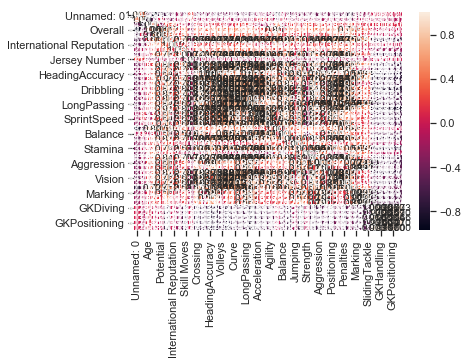

In [38]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True,  fmt='.3f')